In [1]:
import pandas as pd
import torch

In [5]:
dataset = torch.load('./datasets/mpc_expert_dataset.pt', weights_only=False)

In [7]:
# dataset['states'] 是一个形状为 (n_timesteps, 5) 的 NumPy 数组
states = dataset['states']

# 将 states 转换为 DataFrame，并指定列名
state_columns = ['v_ego', 'a_ego', 'x_ego', 'delta_v', 'delta_d']
states_df = pd.DataFrame(states, columns=state_columns)

In [9]:
# 查看 DataFrame 的前几行
print(states_df.head())

       v_ego  a_ego     x_ego   delta_v    delta_d
0  20.454973    0.0  0.000000  1.762797  15.000000
1  20.454973    0.0  0.000000  1.762797  15.000000
2  20.426973   -3.0  4.089995  1.790797  15.353559
3  20.349651   -3.0  6.129154  1.868120  15.536178
4  20.231951   -3.0  8.158502  1.985821  15.728607


In [27]:
states_df['x_ego'][850:900]

850    1078.899780
851    1080.010986
852    1081.122314
853    1082.233521
854    1083.344971
855    1084.456299
856    1085.567749
857    1086.679199
858    1087.790527
859    1088.901855
860    1090.012695
861    1091.122803
862    1092.231689
863    1093.339111
864    1094.445312
865    1095.550293
866    1096.654297
867    1097.757690
868    1098.860962
869    1099.963989
870       0.000000
871       0.000000
872       3.953102
873       5.927439
874       7.895313
875       9.852458
876      11.795378
877      13.721213
878      15.627622
879      17.512686
880      19.374838
881      21.212790
882      23.025492
883      24.812080
884      26.571854
885      28.304232
886      30.008743
887      31.685001
888      33.332691
889      34.951550
890      36.541367
891      38.101967
892      39.633209
893      41.134979
894      42.607182
895      44.049732
896      45.462574
897      46.845650
898      48.198921
899      49.522781
Name: x_ego, dtype: float32

In [23]:
11*3.6

39.6

In [29]:
# 假设 states_df 是你的 DataFrame
# 找出所有 x_ego == 0 的索引
zero_x_ego_indices = states_df[states_df['x_ego'] == 0].index

# 打印结果
print("所有 x_ego = 0 的索引：", zero_x_ego_indices.tolist())
print("满足条件的行数：", len(zero_x_ego_indices))

所有 x_ego = 0 的索引： [0, 1, 870, 871, 1814, 1815, 2436, 2437, 3198, 3199, 4167, 4168, 4707, 4708, 5229, 5230, 5970, 5971, 6509, 6510, 7511, 7512, 8271, 8272, 8977, 8978, 9708, 9709, 10579, 10580, 11402, 11403, 12458, 12459, 13182, 13183, 13951, 13952, 14623, 14624, 15263, 15264, 15831, 15832, 16291, 16292, 17035, 17036, 17572, 17573, 18323, 18324, 18958, 18959, 19619, 19620, 20414, 20415, 21180, 21181, 21741, 21742, 22289, 22290, 23107, 23108, 23597, 23598, 24165, 24166, 24722, 24723, 25433, 25434, 25959, 25960, 26600, 26601, 27169, 27170, 27816, 27817, 28304, 28305, 28816, 28817, 29264, 29265, 29800, 29801, 30337, 30338, 30995, 30996, 31782, 31783, 32489, 32490, 32980, 32981, 33717, 33718, 34470, 34471, 35185, 35186, 35791, 35792, 36498, 36499, 37474, 37475, 38228, 38229, 38907, 38908, 39882, 39883, 40519, 40520, 41184, 41185, 41753, 41754, 42683, 42684, 43327, 43328, 43783, 43784, 44272, 44273, 45228, 45229, 45681, 45682, 46496, 46497, 47124, 47125, 47718, 47719, 48435, 48436, 49042, 49

In [31]:
zero_x_ego_indices

Index([      0,       1,     870,     871,    1814,    1815,    2436,    2437,
          3198,    3199,
       ...
       3339799, 3339800, 3340314, 3340315, 3341034, 3341035, 3341555, 3341556,
       3342125, 3342126],
      dtype='int64', length=10000)

In [33]:
zero_xego_array = zero_x_ego_indices.tolist()
zero_xego_array

[0,
 1,
 870,
 871,
 1814,
 1815,
 2436,
 2437,
 3198,
 3199,
 4167,
 4168,
 4707,
 4708,
 5229,
 5230,
 5970,
 5971,
 6509,
 6510,
 7511,
 7512,
 8271,
 8272,
 8977,
 8978,
 9708,
 9709,
 10579,
 10580,
 11402,
 11403,
 12458,
 12459,
 13182,
 13183,
 13951,
 13952,
 14623,
 14624,
 15263,
 15264,
 15831,
 15832,
 16291,
 16292,
 17035,
 17036,
 17572,
 17573,
 18323,
 18324,
 18958,
 18959,
 19619,
 19620,
 20414,
 20415,
 21180,
 21181,
 21741,
 21742,
 22289,
 22290,
 23107,
 23108,
 23597,
 23598,
 24165,
 24166,
 24722,
 24723,
 25433,
 25434,
 25959,
 25960,
 26600,
 26601,
 27169,
 27170,
 27816,
 27817,
 28304,
 28305,
 28816,
 28817,
 29264,
 29265,
 29800,
 29801,
 30337,
 30338,
 30995,
 30996,
 31782,
 31783,
 32489,
 32490,
 32980,
 32981,
 33717,
 33718,
 34470,
 34471,
 35185,
 35186,
 35791,
 35792,
 36498,
 36499,
 37474,
 37475,
 38228,
 38229,
 38907,
 38908,
 39882,
 39883,
 40519,
 40520,
 41184,
 41185,
 41753,
 41754,
 42683,
 42684,
 43327,
 43328,
 43783,
 437

In [39]:
# 保留偶数索引项（索引 0, 2, 4, ...）
filtered_zero_xego_arr = [zero_xego_array[i] for i in range(len(zero_xego_array)) if i % 2 == 0]
filtered_zero_xego_arr

[0,
 870,
 1814,
 2436,
 3198,
 4167,
 4707,
 5229,
 5970,
 6509,
 7511,
 8271,
 8977,
 9708,
 10579,
 11402,
 12458,
 13182,
 13951,
 14623,
 15263,
 15831,
 16291,
 17035,
 17572,
 18323,
 18958,
 19619,
 20414,
 21180,
 21741,
 22289,
 23107,
 23597,
 24165,
 24722,
 25433,
 25959,
 26600,
 27169,
 27816,
 28304,
 28816,
 29264,
 29800,
 30337,
 30995,
 31782,
 32489,
 32980,
 33717,
 34470,
 35185,
 35791,
 36498,
 37474,
 38228,
 38907,
 39882,
 40519,
 41184,
 41753,
 42683,
 43327,
 43783,
 44272,
 45228,
 45681,
 46496,
 47124,
 47718,
 48435,
 49042,
 49612,
 50322,
 50879,
 51585,
 52302,
 53028,
 53761,
 54651,
 55469,
 56211,
 56783,
 57340,
 58050,
 58815,
 59310,
 60152,
 60736,
 61442,
 62150,
 62818,
 63415,
 63998,
 64509,
 65109,
 65563,
 66296,
 66916,
 67476,
 68136,
 69018,
 69542,
 70250,
 71109,
 71834,
 72613,
 73356,
 74029,
 74664,
 75179,
 75790,
 76555,
 77329,
 77944,
 78714,
 79338,
 80194,
 80908,
 81620,
 82239,
 82877,
 83834,
 84376,
 84823,
 85377,
 8

In [73]:
filtered_zero_xego_arr[-3:-1]

[3341034, 3341555]

In [53]:
import math

def nearest_multiple_of_10(n):
    # 小于等于 n 的最大 10 的倍数
    lower = math.floor(n / 10) * 10
    # 大于等于 n 的最小 10 的倍数
    upper = math.ceil(n / 10) * 10
    
    # 比较距离，选择最近的
    if abs(n - lower) <= abs(n - upper):
        return lower if lower > 0 else upper  # 确保返回正整数
    else:
        return upper

# 示例
numbers = [21.6, 19.4, 20, 35, 5, -5]
for num in numbers:
    result = nearest_multiple_of_10(num)
    print(f"{num} 最近的能被 10 整除的正整数是：{result}")

21.6 最近的能被 10 整除的正整数是：20
19.4 最近的能被 10 整除的正整数是：20
20 最近的能被 10 整除的正整数是：20
35 最近的能被 10 整除的正整数是：30
5 最近的能被 10 整除的正整数是：10
-5 最近的能被 10 整除的正整数是：0


In [75]:
for i in range(len(filtered_zero_xego_arr)-1):
    v_des = nearest_multiple_of_10(states_df.loc[filtered_zero_xego_arr[i+1]-1, 'v_ego']*3.6)
    states_df.loc[filtered_zero_xego_arr[i]:(filtered_zero_xego_arr[i+1]), 'v_des'] = v_des

states_df.loc[filtered_zero_xego_arr[-1]:, 'v_des'] = 30

In [77]:
states_df.head()

,v_ego,a_ego,x_ego,delta_v,delta_d,v_des
0,20.454973,0.0,0.000000,1.762797,15.000000,40.0
1,20.454973,0.0,0.000000,1.762797,15.000000,40.0
2,20.426973,-3.0,4.089995,1.790797,15.353559,40.0
3,20.349651,-3.0,6.129154,1.868120,15.536178,40.0
4,20.231951,-3.0,8.158502,1.985821,15.728607,40.0


In [79]:
states_df['v_des'].describe()

count    3.342781e+06
mean     3.843176e+01
std      1.408875e+01
min      2.000000e+01
25%      3.000000e+01
50%      4.000000e+01
75%      5.000000e+01
max      6.000000e+01
Name: v_des, dtype: float64

In [85]:
import numpy as np
v_des_values = states_df['v_des'].tolist()
print("v_des 列的所有值：", np.unique(v_des_values))

v_des 列的所有值： [20. 30. 40. 50. 60.]


In [87]:
states_df['v_des'] = states_df['v_des']/3.6
states_df.head()

,v_ego,a_ego,x_ego,delta_v,delta_d,v_des
0,20.454973,0.0,0.000000,1.762797,15.000000,11.111111
1,20.454973,0.0,0.000000,1.762797,15.000000,11.111111
2,20.426973,-3.0,4.089995,1.790797,15.353559,11.111111
3,20.349651,-3.0,6.129154,1.868120,15.536178,11.111111
4,20.231951,-3.0,8.158502,1.985821,15.728607,11.111111


In [89]:
states_df.to_csv('states_df.csv', index=False)

In [3]:
import matplotlib.pyplot as plt

In [5]:
states_df = pd.read_csv('states_df.csv')
states_df.head()

,v_ego,a_ego,x_ego,delta_v,delta_d,v_des
0,20.454973,0.0,0.000000,1.762797,15.000000,11.111111
1,20.454973,0.0,0.000000,1.762797,15.000000,11.111111
2,20.426973,-3.0,4.089995,1.790797,15.353559,11.111111
3,20.349651,-3.0,6.129154,1.868120,15.536178,11.111111
4,20.231950,-3.0,8.158502,1.985821,15.728607,11.111111


In [13]:
v = []
x = []
a = []

for i in range(869):
    v_ego = states_df.loc[i+1, 'v_ego']
    x_ego = states_df.loc[i+1, 'x_ego']
    a_ego = states_df.loc[i+1, 'a_ego']
    v.append(v_ego)
    a.append(a_ego)
    x.append(x_ego)
v[1:20]

[20.426973,
 20.349651,
 20.23195,
 20.081192,
 19.90337,
 19.703394,
 19.485281,
 19.25232,
 19.0072,
 18.75213,
 18.488913,
 18.219025,
 17.943678,
 17.663858,
 17.38038,
 17.093906,
 16.804981,
 16.514046,
 16.221468]

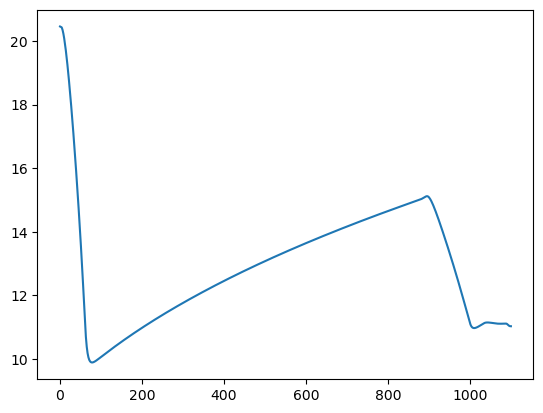

In [15]:
import os
import sys
# sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"  # 可选，仅在必要时启用
plt.plot(x, v)
plt.show()

In [27]:
v = []
x = []
a = []

for i in range(55470,56211):
    v_ego = states_df.loc[i, 'v_ego']
    x_ego = states_df.loc[i, 'x_ego']
    a_ego = states_df.loc[i, 'a_ego']
    v.append(v_ego)
    a.append(a_ego)
    x.append(x_ego)
v[0:20]

[23.568832,
 23.540833,
 23.46351,
 23.345808,
 23.195051,
 23.01723,
 22.817253,
 22.59914,
 22.366179,
 22.12106,
 21.86599,
 21.602772,
 21.332884,
 21.057535,
 20.777718,
 20.49424,
 20.207766,
 19.91884,
 19.627905,
 19.335327]

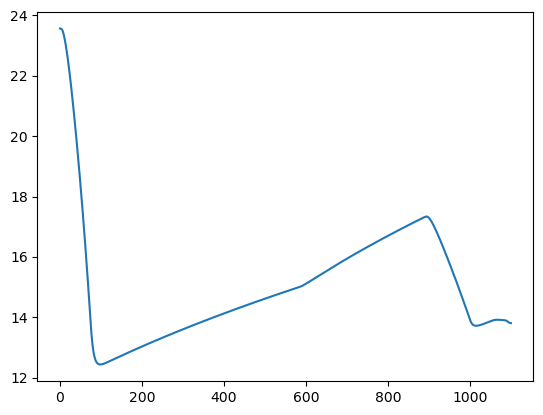

In [31]:
plt.plot(x, v)
plt.show()